In [26]:
# It contains all operations for building a machine learning model

Importing files/data from analysis.ipynb file for creating model

In [27]:
import nltk
import pandas as pd
nltk.download('punkt')
pd.set_option('display.max_rows', None)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TUSHAR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   repo_name       1500 non-null   object
 1   star            1500 non-null   object
 2   fork            1500 non-null   object
 3   watch           1500 non-null   object
 4   issue           1500 non-null   object
 5   tags            1500 non-null   object
 6   description     1480 non-null   object
 7   contributers    1500 non-null   object
 8   license         1500 non-null   object
 9   repo_url        1500 non-null   object
 10  most_used_lang  1297 non-null   object
dtypes: object(11)
memory usage: 140.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   repo_name       1500 non-null   object
 1   star            1500 non-null   ob

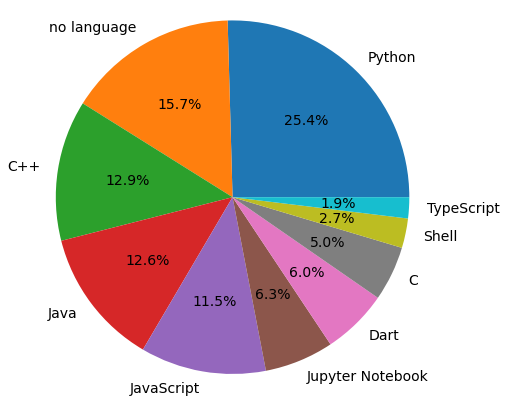

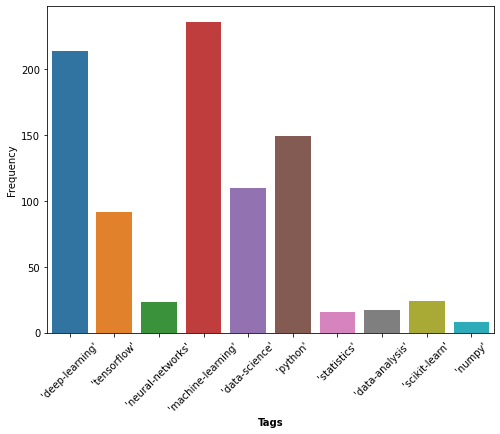

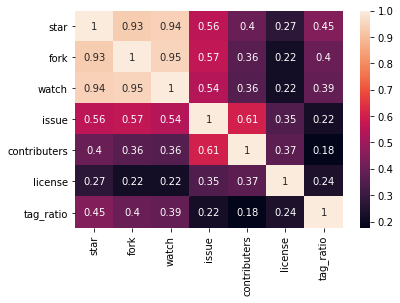

In [28]:
%run analysis.ipynb

In [29]:
data.head()

,repo_name,star,fork,watch,issue,tags,description,contributers,license,repo_url,most_used_lang,tag_ratio
0,keras,47900,18100,2100,2940,"['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,49,1,https://github.com/keras-team/keras,Python,9.439798
1,scikit-learn,40300,19600,2200,1505,"['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,108,1,https://github.com/scikit-learn/scikit-learn,Python,6.048803
2,PythonDataScienceHandbook,23100,9900,1500,65,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,0,1,https://github.com/jakevdp/PythonDataScienceHa...,Jupyter Notebook,2.463054
3,Probabilistic-Programming-and-Bayesian-Methods...,21000,6600,1400,127,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",0,1,https://github.com/CamDavidsonPilon/Probabilis...,Jupyter Notebook,1.752778
4,Data-Science--Cheat-Sheet,18400,8200,1500,7,[],Cheat Sheets,0,0,https://github.com/abhat222/Data-Science--Chea...,no language,0.000000


Description is also play a role in the popularity of your repos, so we need to clean  `description` tuple by removing punctuations and creating word counts.

In [30]:
data['repo_desc']=data['description']
data['description']=data['description'].str.replace('\W'," ")
data['description']=data['description'].str.lower()

Tokenizing description 

In [31]:
text=[]
for index,row in data.iterrows():
    tokens=nltk.word_tokenize(row['description'])
    text.append(tokens)

In [32]:
from nltk.corpus import stopwords
stopword=stopwords.words('english')

To get numerical form of description , we create word dict according to their frequency i.e. the word which occurs more would be have low index value and removing words which has less `freq`(threshold=1)

In [33]:
def txt_to_num(text, threshold_rarewords = 1):
    
    # removing sublist from text list
    if len(text) > 1:
        text_list = [item for sublist in text for item in sublist]
    else:
        text_list = text
    
    # get word freuqncy
    freq_word = nltk.FreqDist(text_list)


    df = pd.DataFrame.from_dict(freq_word, orient='index')
    df.columns = ['freq']
      

    df.sort_values(by=['freq'], ascending=False, inplace=True)
  
    # Add word index
    number_of_words = df.shape[0]
    for word in df.index:
        if word in stopword:
            df.loc[word]['freq']=0
    df.sort_values('freq',inplace=True,ascending=False)
    
    df['word_index'] = list(np.arange(number_of_words)+1)
    
    # indexing 0 for rare words 
    frequency = df['freq'].values
    word_index = df['word_index'].values
    mask = frequency <= threshold_rarewords
    word_index[mask] = 0
    df['word_index'] =  word_index
    

    word_dict = df['word_index'].to_dict()

    #dict for word into num
    text_num = []
    for string in text:
        string_numbers = [word_dict[word] for word in string]
        text_num.append(string_numbers)  
    
    return (text_num)

In [34]:
desc_num=txt_to_num(text)
txt=[sum(x)  for x in desc_num]
data['desc_to_num']=txt

In [35]:
desc_num[0]

[17, 1, 0, 553]

In [36]:
repo_text=[]
for index,row in data.iterrows():
    tokens=nltk.word_tokenize(row['repo_name'])
    repo_text.append(tokens)

['keras']

In [37]:
repo_num=txt_to_num(repo_text)
txt=[sum(x)  for x in repo_num]
data['repo_to_num']=txt

In [38]:
data.head()

,repo_name,star,fork,watch,issue,tags,description,contributers,license,repo_url,most_used_lang,tag_ratio,repo_desc,desc_to_num,repo_to_num
0,keras,47900,18100,2100,2940,"['deep-learning', 'tensorflow', 'neural-networ...",deep learning for humans,49,1,https://github.com/keras-team/keras,Python,9.439798,Deep Learning for humans,571,73
1,scikit-learn,40300,19600,2200,1505,"['machine-learning', 'python', 'statistics', '...",scikit learn machine learning in python,108,1,https://github.com/scikit-learn/scikit-learn,Python,6.048803,scikit-learn: machine learning in Python,307,33
2,PythonDataScienceHandbook,23100,9900,1500,65,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",python data science handbook full text in jup...,0,1,https://github.com/jakevdp/PythonDataScienceHa...,Jupyter Notebook,2.463054,Python Data Science Handbook: full text in Jup...,859,0
3,Probabilistic-Programming-and-Bayesian-Methods...,21000,6600,1400,127,"['bayesian-methods', 'pymc', 'mathematical-ana...",aka bayesian methods for hackers an introdu...,0,1,https://github.com/CamDavidsonPilon/Probabilis...,Jupyter Notebook,1.752778,"aka ""Bayesian Methods for Hackers"": An introdu...",6863,0
4,Data-Science--Cheat-Sheet,18400,8200,1500,7,[],cheat sheets,0,0,https://github.com/abhat222/Data-Science--Chea...,no language,0.000000,Cheat Sheets,902,0


From above we can see that their are some numerical values and stopwords too, so we need to remove them from vocabulary list

In [39]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword=stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TUSHAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Training model

In [40]:
## LR can be used:
# gradient descent
# reandom forest 
# NN regression (Relu)
# Lasso regression
# Ridge regression
# Elastic netregression


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(data[['fork','watch','issue','contributers','license','tag_ratio','desc_to_num','repo_to_num']], data['star'], test_size=0.2, random_state=22)

Gradient Descent

In [42]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(loss='squared_loss',alpha=0.001,max_iter=3500)
sgd.fit(X_train, y_train)
predictions = sgd.predict(X_test)
mse = mean_squared_error(y_test, predictions, squared=False)
print(mse)
print("R2 score: ",r2_score(y_test, predictions))

2.733037787381252e+16
R2 score:  -2.8855629228783034e+24


Normal Equation

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
mse = mean_squared_error(y_test, predictions, squared=False)
print(mse)
print("R2 score: ",r2_score(y_test, predictions))

6582.340254745944
R2 score:  0.8326213993978495


Random forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=20, random_state=1)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
mse = mean_squared_error(y_test, predictions, squared=False)
print(mse)
print("R2 score: ",r2_score(y_test, predictions))

5874.996345058188
R2 score:  0.8666618338443305


In [45]:
# from numpy import loadtxt
# from keras.models import Sequential
# from keras.layers import Dense
# X = data[['fork','watch','issue','contributers','license','tag_ratio','desc_to_num','repo_to_num']]
# y = data['star']

# model = Sequential()
# model.add(Dense(8, input_dim=8, activation='relu'))
# model.add(Dense(1, activation='relu'))


# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# model.fit(X, y, epochs=150, batch_size=500)

# _, accuracy = model.evaluate(X, y)
# print('Accuracy: %.2f' % (accuracy*100))

Lasso


In [46]:
from sklearn import linear_model
las = linear_model.Lasso(alpha=0.01,max_iter=2000)
las.fit(X_train, y_train)
predictions = las.predict(X_test)
mse = mean_squared_error(y_test, predictions, squared=False)
print(mse)
print("R2 score: ",r2_score(y_test, predictions))

6582.340712329456
R2 score:  0.8326213761265849


Ridge

In [47]:
from sklearn import linear_model
las = linear_model.Ridge(alpha=0.001,max_iter=3000)
las.fit(X_train, y_train)
predictions = las.predict(X_test)
mse = mean_squared_error(y_test, predictions, squared=False)
print(mse)
print(las.score(X_test,y_test))


6582.34036335873
0.8326213938741434


Elastic netregression

In [48]:
from sklearn.linear_model import ElasticNet
elsnr = ElasticNet(alpha=0.1,max_iter=3000)
elsnr.fit(X_train, y_train)
predictions = elsnr.predict(X_test)
mse = mean_squared_error(y_test, predictions, squared=False)
print(mse)
print(elsnr.score(X_test,y_test))


6589.606872053649
0.832251638022106
